In [1]:
import warnings

import moscot as mt
from moscot import datasets
from moscot.problems.space import AlignmentProblem

import scanpy as sc
import squidpy as sq

warnings.simplefilter("ignore", UserWarning)

import pandas as pd

In [2]:
datasets = ["10X","slide","stereo"]
input_dir = 'G:/dataset/06-Mouse olfactory bulb/input/35um/'
output_dir = 'G:/dataset/06-Mouse olfactory bulb/output/35um/moscot/'
experiment_name = 'MouseOB25um'

In [3]:
import anndata as ad
adata_list = []

for dataset in datasets:
    # adata = sc.read_visium(input_dir + dataset)
    # adata.var_names_make_unique()
    # adata.obs_names_make_unique()

    adata = sc.read_h5ad(input_dir + dataset + '.h5ad')
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    
    df = adata.obs[['x','y']].astype('float32')
    adata.obsm['spatial'] = df.values
    
    # make spot name unique
    adata.obs_names = [x + '_' + dataset for x in adata.obs_names]

    adata_list.append(adata)

print(adata_list)
adata = ad.concat(adata_list, label="slice_name", keys=datasets)
# adata =sc.AnnData.concatenate(adata_list[0],adata_list[1],adata_list[2],adata_list[3])
print(adata)
del adata_list

[AnnData object with n_obs × n_vars = 1185 × 32285
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'X', 'celltype', 'batch', 'row', 'col', 'x', 'y', 'imagerow', 'imagecol'
    var: 'features'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 18537 × 5531
    obs: 'orig.ident', 'nCount_slide', 'nFeature_slide', 'celltype', 'batch', 'x', 'y'
    var: 'features'
    obsm: 'spatial', AnnData object with n_obs × n_vars = 8827 × 5531
    obs: 'orig.ident', 'nCount_stereo', 'nFeature_stereo', 'celltype', 'batch', 'x', 'y'
    var: 'features'
    obsm: 'spatial']
AnnData object with n_obs × n_vars = 28549 × 5330
    obs: 'orig.ident', 'celltype', 'batch', 'x', 'y', 'slice_name'
    obsm: 'spatial'


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):


D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:649:

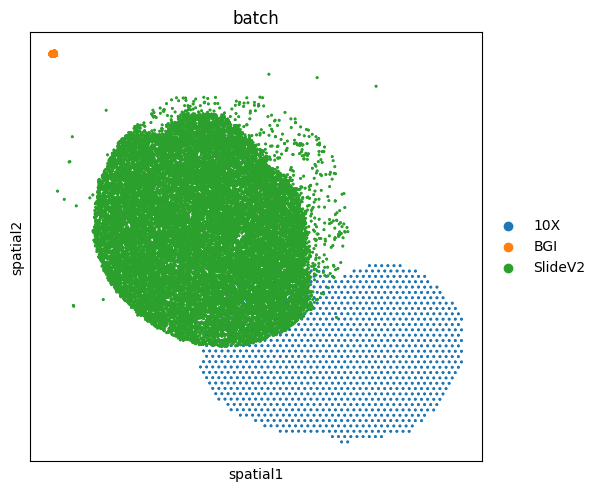

In [4]:
sq.pl.spatial_scatter(adata, shape=None, library_id="batch", color="batch")

In [5]:
%%time

ap = AlignmentProblem(adata=adata)
ap = ap.prepare(batch_key="batch", policy="sequential")

ap = ap.solve()

INFO     Ordering Index(['AAACAAGTATCTCCCA-1_10X', 'AAACCGGGTAGGTACC-1_10X',                                       
                'AAACCGTTCGTCCAGG-1_10X', 'AAACGAGACGGTTGAT-1_10X',                                                
                'AAACTGCTGGCTCCAA-1_10X', 'AAACTTGCAAACGTAT-1_10X',                                                
                'AAAGGCTCTCGCGCCG-1_10X', 'AAAGTAGCATTGCTCA-1_10X',                                                
                'AAAGTGTGATTTATCT-1_10X', 'AAAGTTGACTCCCGTA-1_10X',                                                
                ...                                                                                                
                'AAAABDAHG_stereo', 'AAAABDAHH_stereo', 'AAAABDAHI_stereo',                                        
                'AAAABDAIA_stereo', 'AAAABDAIB_stereo', 'AAAABDAIC_stereo',                                        
                'AAAABDAID_stereo', 'AAAABDAIE_stereo', 'AAAABDAIF_stere

D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                                                                   
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical

INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                                                                   
INFO     Solving `2` problems                                                                                      
INFO     Solving problem OTProblem[stage='prepared', shape=(1185, 8827)].                                          


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical

INFO     Solving problem OTProblem[stage='prepared', shape=(8827, 18537)].                                         


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


CPU times: total: 4h 6s
Wall time: 1h 8min 7s


D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


AnnData object with n_obs × n_vars = 28549 × 5330 backed at 'G:\\dataset\\06-Mouse olfactory bulb\\output\\35um\\moscot\\moscot_MouseOB25um.h5ad'
    obs: 'orig.ident', 'celltype', 'batch', 'x', 'y', 'slice_name'
    uns: 'batch_colors', 'spatial_affine_sequential'
    obsm: 'spatial', 'spatial_warp_sequential', 'spatial_affine_sequential'


D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:649:

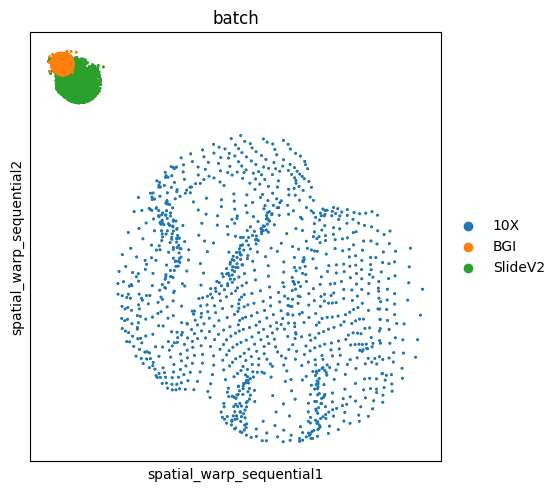

In [14]:
ap.align(reference="SlideV2", mode="warp", spatial_key="spatial", key_added="spatial_warp_sequential")
print(adata)

sq.pl.spatial_scatter(
    adata, shape=None, spatial_key="spatial_warp_sequential", library_id="batch", color="batch"
)

D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
D:\anaconda\envs\moscot\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None a

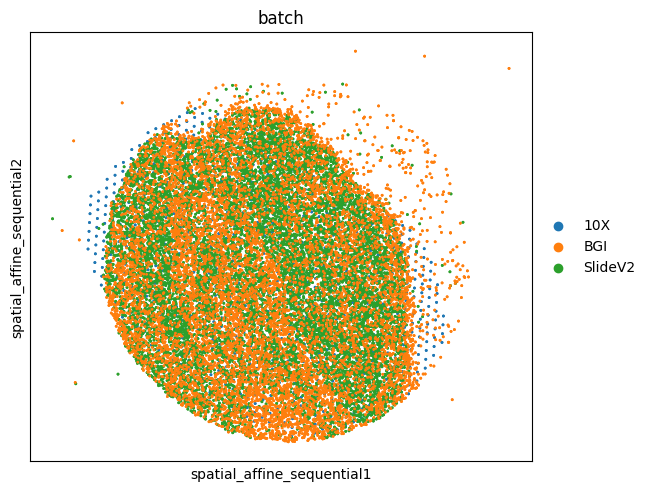

In [15]:
ap.align(reference="SlideV2", mode="affine", spatial_key="spatial", key_added="spatial_affine_sequential")

sq.pl.spatial_scatter(
    adata, shape=None, spatial_key="spatial_affine_sequential", library_id="batch", color="batch"
)

In [ ]:
# %%time

# ap_star = AlignmentProblem(adata=adata)
# ap_star = ap_star.prepare(batch_key="batch", policy="star", reference="0")

# ap_star = ap_star.solve()

In [ ]:
# ap_star.align(reference="0", mode="warp", spatial_key="spatial", key_added="spatial_warp_star")
# print(adata)

# sq.pl.spatial_scatter(
#     adata, shape=None, spatial_key="spatial_warp_star", library_id="batch", color="batch"
# )

In [ ]:
# ap_star.align(reference="0", mode="affine", spatial_key="spatial", key_added="spatial_affine_star")

# sq.pl.spatial_scatter(
#     adata, shape=None, spatial_key="spatial_affine_star", library_id="batch", color="batch"
# )

In [8]:
adata

AnnData object with n_obs × n_vars = 28549 × 5330
    obs: 'orig.ident', 'celltype', 'batch', 'x', 'y', 'slice_name'
    uns: 'batch_colors', 'spatial_affine_sequential'
    obsm: 'spatial', 'spatial_warp_sequential', 'spatial_affine_sequential'

In [13]:
df_warp = pd.DataFrame(data=adata.obsm['spatial_warp_sequential'],
                   index= adata.obs_names, columns=['spatial_warp_sequential_x', 'spatial_warp_sequential_y'])
df_warp.to_csv(output_dir+'spatial_warp_sequential_SlideV2.csv',sep=',',index=True,header=True)

df_affine = pd.DataFrame(data=adata.obsm['spatial_affine_sequential'],
                   index= adata.obs_names, columns=['spatial_affine_sequential_x', 'spatial_affine_sequential_y'])
df_affine.to_csv(output_dir+'spatial_affine_sequential_SlideV2.csv',sep=',',index=True,header=True)

In [10]:
print(adata.isbacked)
adata.obs = adata.obs.astype('str')
adata.filename = output_dir + 'moscot_' + experiment_name + '.h5ad'
print(adata.isbacked)

False
True
